### **Importing Necessary Libraries**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

## **Problem 1** : _Linear Convolution_

In [247]:
def convolve_linear_brute_force(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    x = np.pad(x, (len(h)-1,len(h)-1))                                          # Pad Zeros at the start and end
    y = np.zeros(len(x)+len(h)-1)                                               # Initialise empty array for y

    shift = 0
    while len(h)+shift<=len(x):                                                 # Looping till flipped h reaches the end

        y[shift] = np.sum(np.flip(h) * x[shift:len(h)+shift])                   # Point wise multiply flipped h and x and sum it up
        shift+=1
    y = np.trim_zeros(y)                                                        # Trip extra zeros at the start and end (if any)

    return y

In [248]:
def convolve_linear_toeplitz(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    h = np.pad(h,(0,len(x)-1))                                                  # Pad necessary zeros at the end of h
    H = np.transpose([np.roll(h,shift) for shift in range(len(x))])             # Create the toeplitz matrix

    y = np.trim_zeros(np.matmul(H,x))                                           # Multiply H and x to find y (Remove any extra zeros at the end if any)

    return y

In [249]:
def convolve_linear_using_dft(x,h):

    X = np.fft.fft(x, n = (len(x)+len(h)-1))                                    # Take N + M - 1 pt dft of x
    H = np.fft.fft(h, n = (len(x)+len(h)-1))                                    # Take N + M - 1 pt dft of x

    y = np.real(np.fft.ifft(H*X))                                               # Pt wise multiply H and X and take IDFT

    return y

In [250]:
# Signal Construction

fs = 200                                                                        # Sampling Frequency
f = 20                                                                          # Frequency of Given Sinusoid
t = np.arange(0,1,1/fs)                                                         # Creating TimeStamps array
eta = np.random.normal(size = len(t), loc = 0, scale = 0.2)                     # Noise
x = np.sin(2*math.pi*f*t) + 0.8*eta                                             # Final Signal (x)
h = np.ones(3)*1/3                                                              # Filter (h)

Text(0, 0.5, 'Amplitude')

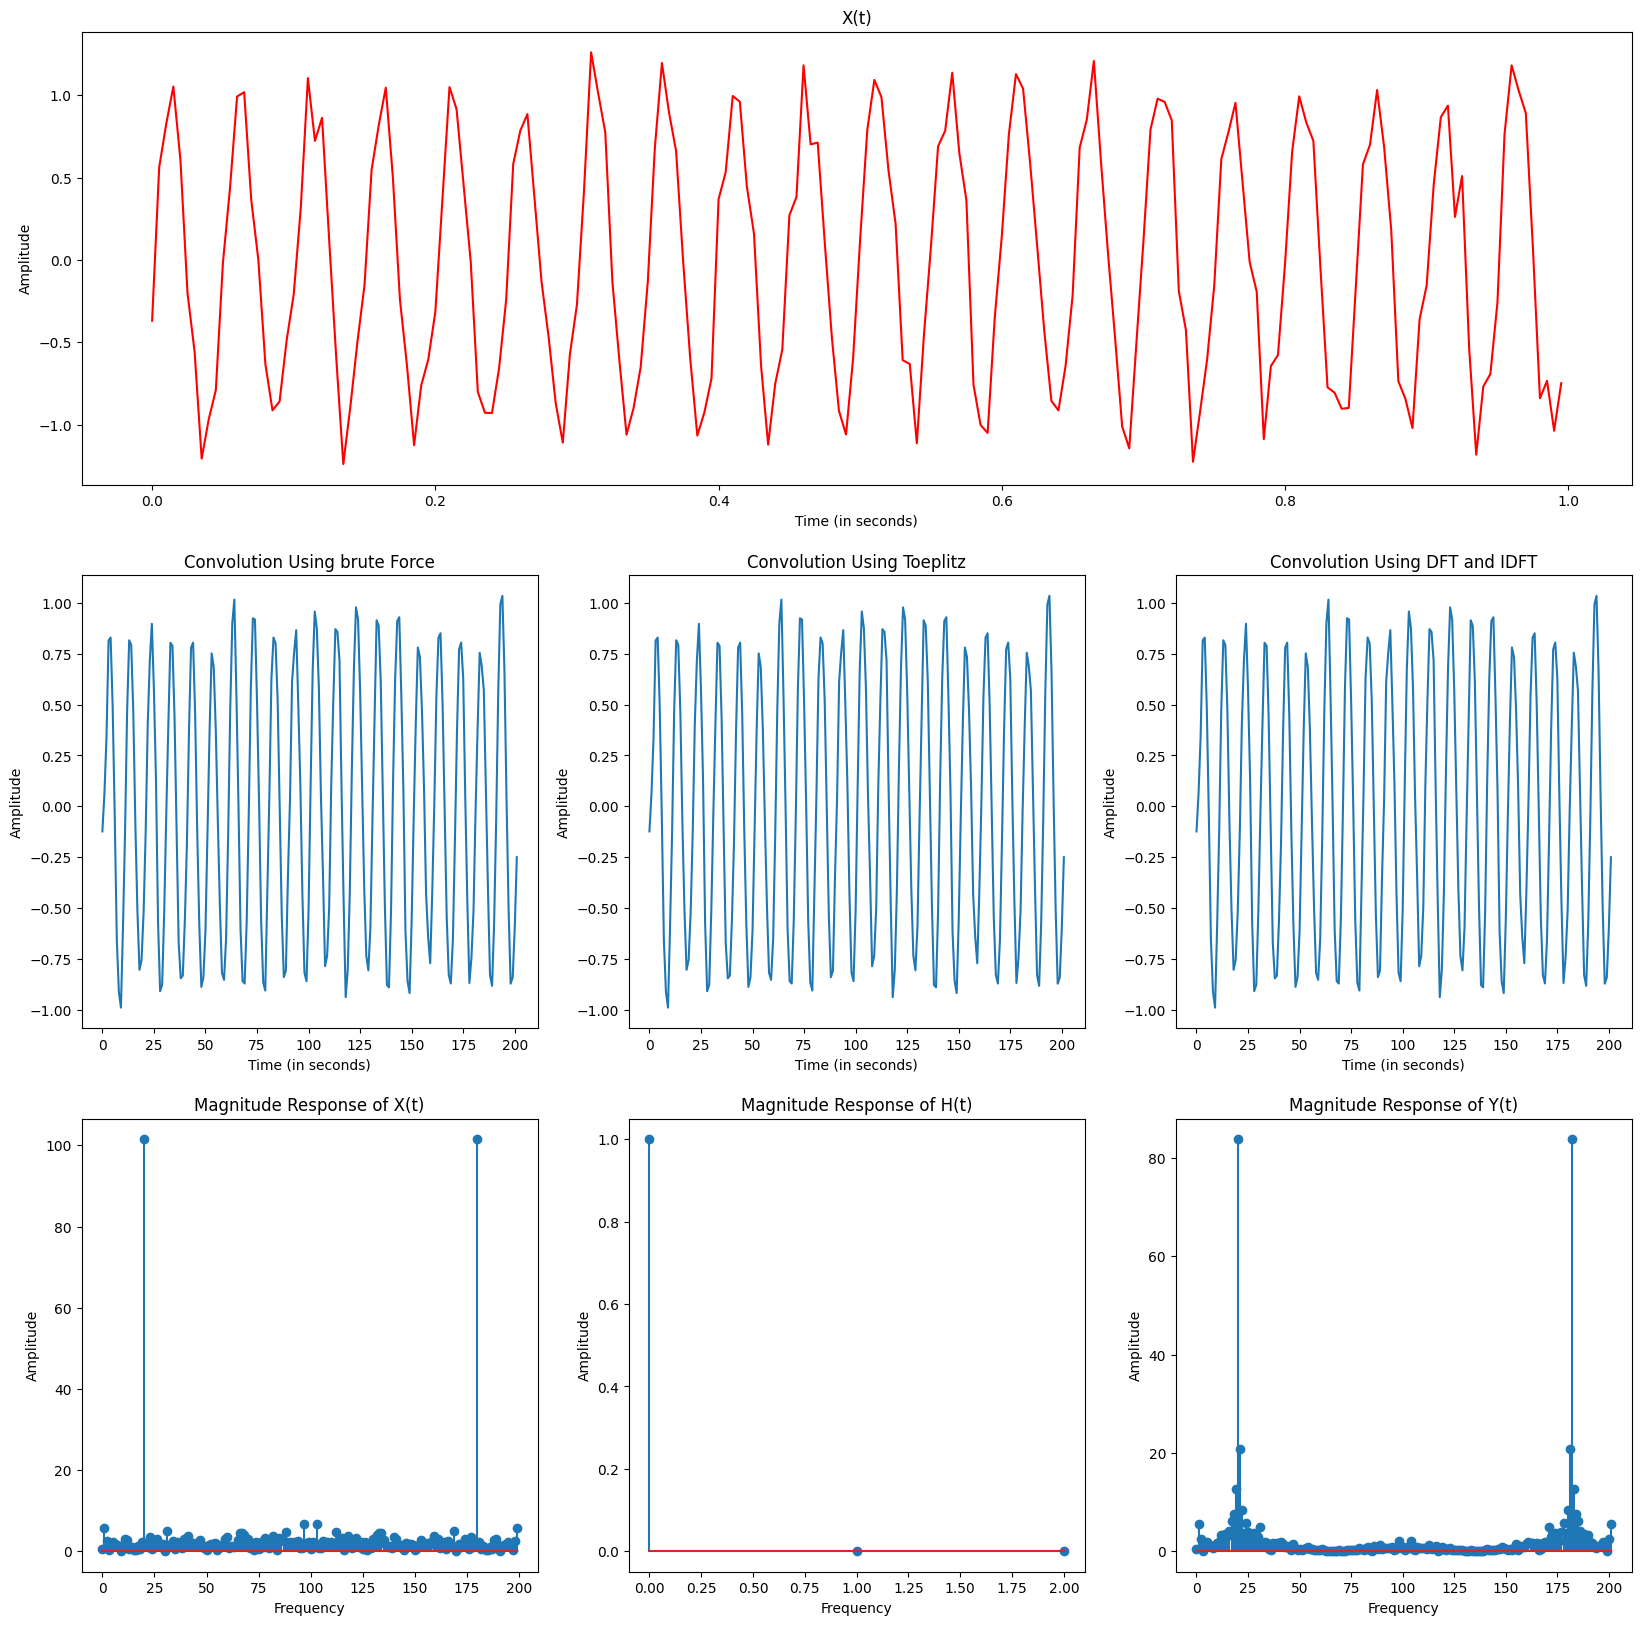

In [251]:
# Result Cell

plt.figure(figsize = (20,20))

plt.subplot(3,3,(1,3))
plt.plot(t,x,'r')
plt.title('X(t)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,4)
plt.plot(convolve_linear_brute_force(x,h))
plt.title('Convolution Using brute Force')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,5)
plt.plot(convolve_linear_toeplitz(x,h))
plt.title('Convolution Using Toeplitz')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,6)
plt.plot(convolve_linear_using_dft(x,h))
plt.title('Convolution Using DFT and IDFT')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,7)
plt.stem(np.abs(np.fft.fft(x)))
plt.title('Magnitude Response of X(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(3,3,8)
plt.stem(np.abs(np.fft.fft(h)))
plt.title('Magnitude Response of H(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(3,3,9)
plt.stem(np.abs(np.fft.fft(convolve_linear_using_dft(x,h))))
plt.title('Magnitude Response of Y(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

## **Problem 2** :  _Circular Convolution_

In [252]:
def convolve_circular_circulant(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    h = np.pad(h, (0,max(len(x),len(h)) - len(h)))                              # pad necessary zeros at the end of h
    H = scipy.linalg.circulant(h)                                               # create circulant matrix H
    y = np.matmul(H,x)                                                          # Pointwise multiply H and x

    return y

In [253]:
x = [1,1,1]
h = [1,1,1,1]
convolve_circular_circulant(x,h)

array([3, 3, 3, 3])

In [254]:
def convolve_circular_using_dft(x,h):

    N = max(len(x),len(h))                                                      # Finding the signal with max length = N

    X = np.fft.fft(x,N)                                                         # Finding N point dft of x
    H = np.fft.fft(h,N)                                                         # Finding N point dft of h

    y = np.real(np.fft.ifft(H*X))                                               # Pointwise multiply H and X and take idft

    return y

In [255]:
# Signal Construction

fs = 200                                                                        # Sampling Frequency
f = 20                                                                          # Frequency of Given Sinusoid
t = np.arange(0,1,1/fs)                                                         # Creating TimeStamps array
eta = np.random.normal(size = len(t), loc = 0, scale = 0.2)                     # Noise
x = np.sin(2*math.pi*f*t) + 0.8*eta                                             # Final Signal (x)
h = np.ones(3)*1/3                                                              # Filter (h)

Text(0, 0.5, 'Amplitude')

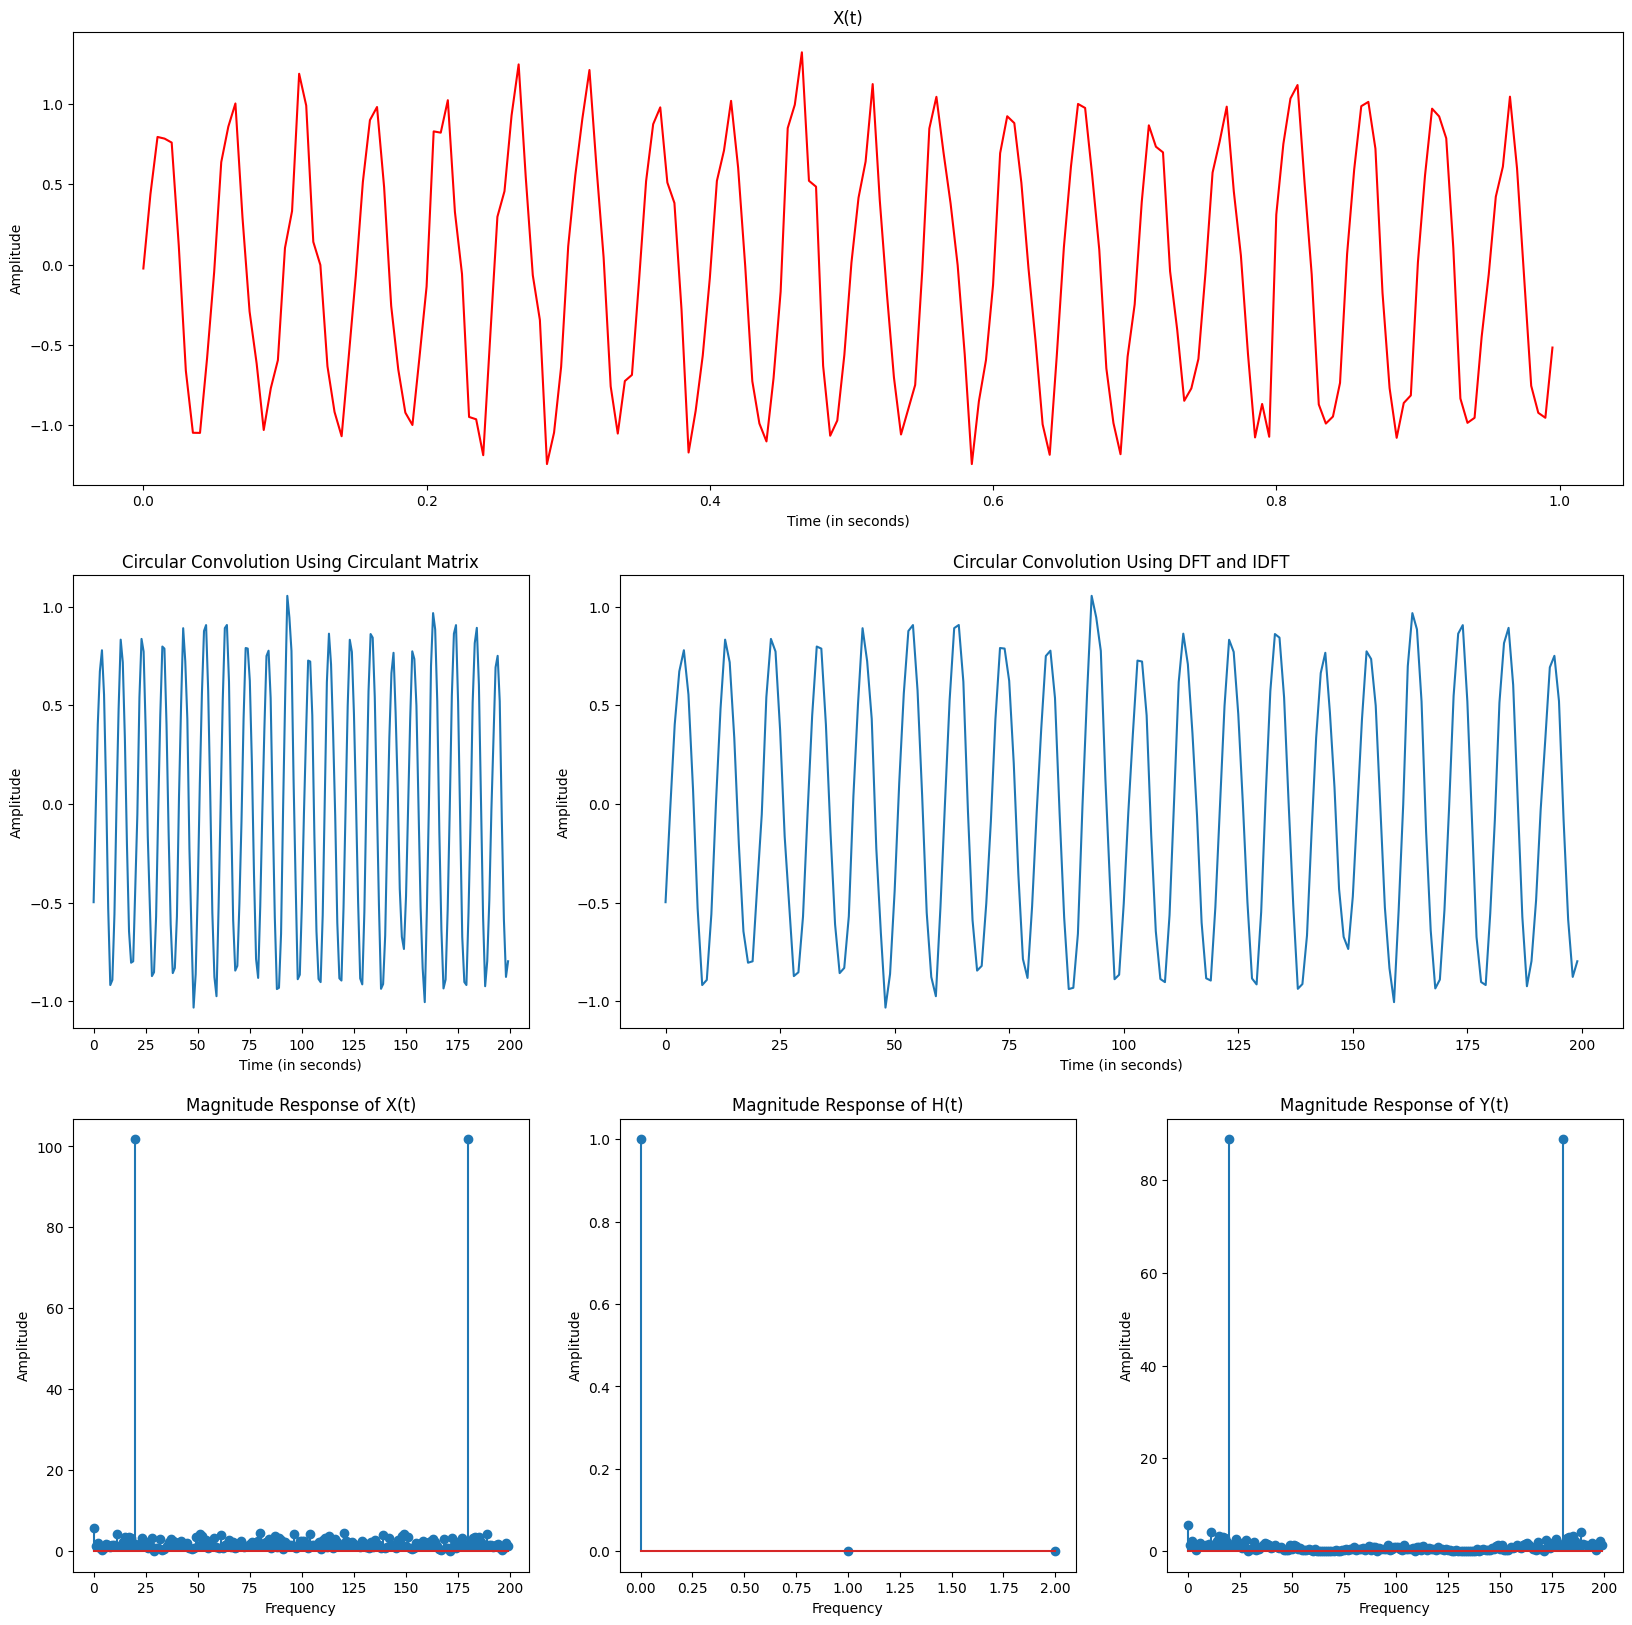

In [256]:
# Result Cell

plt.figure(figsize = (20,20))

plt.subplot(3,3,(1,3))
plt.plot(t,x,'r')
plt.title('X(t)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,4)
plt.plot(convolve_circular_circulant(x,h))
plt.title('Circular Convolution Using Circulant Matrix')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,(5,6))
plt.plot(convolve_circular_using_dft(x,h))
plt.title('Circular Convolution Using DFT and IDFT')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

plt.subplot(3,3,7)
plt.stem(np.abs(np.fft.fft(x)))
plt.title('Magnitude Response of X(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(3,3,8)
plt.stem(np.abs(np.fft.fft(h)))
plt.title('Magnitude Response of H(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(3,3,9)
plt.stem(np.abs(np.fft.fft(convolve_circular_using_dft(x,h))))
plt.title('Magnitude Response of Y(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')